In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Reading cleaned files
life_exp_df = pd.read_csv('../data/Milestone_1_cleaned_files/life_expectancy_clean.csv')
region_df =  pd.read_csv('../data/Milestone_1_cleaned_files/region_clean.csv')
income_df =  pd.read_csv('../data/Milestone_1_cleaned_files/income_clean.csv')
edu_df =  pd.read_csv('../data/Milestone_1_cleaned_files/edu_clean.csv')
crime_df =  pd.read_csv('../data/Milestone_1_cleaned_files/crime_clean.csv')
area_df =  pd.read_csv('../data/Milestone_1_cleaned_files/area_clean.csv')

In [4]:
# Merge all files on State column
merged_data = reduce(lambda x,y: pd.merge(x,y, on='State', how='inner'), 
                     [life_exp_df, region_df, income_df,edu_df,crime_df,area_df])

In [5]:
# set the index as 'State'
merged_data.set_index('State')

,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp,Abb,Region,Division,Income2017,Income2016,Income2015,...,MurderRate,GunMurderRate,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
State,,,,,,,,,,,,,,,,,,,,,
Alabama,75.4,75.4,72.6,78.1,AL,South,East South Central,48123,46257,44765,...,NaN,NaN,52420.07,135767,50645.33,131171,96.61,1774.74,4597,3.39
Alaska,78.8,78.0,76.7,81.2,AK,West,Pacific,73181,76440,73355,...,7.7,5.3,665384.04,1723337,570640.95,1477953,85.76,94743.10,245384,14.24
Arizona,79.9,79.3,77.5,82.3,AZ,West,Mountain,56581,53558,51492,...,4.1,2.5,113990.30,295234,113594.08,294207,99.65,396.22,1026,0.35
Arkansas,75.9,76.0,73.1,78.6,AR,South,West South Central,45869,45907,42798,...,5.5,3.7,53178.55,137732,52035.48,134771,97.85,1143.07,2961,2.15
California,81.6,80.6,79.4,83.8,CA,West,Pacific,71805,67739,64500,...,4.8,3.3,163694.74,423967,155779.22,403466,95.16,7915.52,20501,4.84
Colorado,80.5,80.1,78.5,82.5,CO,West,Mountain,69117,65685,63909,...,3.2,2.1,104093.67,269601,103641.89,268431,99.57,451.78,1170,0.43
Connecticut,80.9,80.7,78.7,83.0,CT,Northeast,New England,74168,73433,71346,...,3.0,2.0,5543.41,14357,4842.36,12542,87.35,701.06,1816,12.65
Delaware,78.4,78.3,76.2,80.6,DE,South,South Atlantic,62852,61757,61255,...,6.7,5.5,2488.72,6446,1948.54,5047,78.29,540.18,1399,21.71
Florida,80.0,79.0,77.3,82.6,FL,South,South Atlantic,52594,50860,49426,...,NaN,NaN,65757.70,170312,53624.76,138887,81.55,12132.94,31424,18.45


# Data Exploration Report

1. Which state has the highest life expectancy and which state the lowest?

In [6]:
print(merged_data['State'][merged_data['LifeExp2018'].argmax()],"has highest life expectancy.")
print(merged_data['State'][merged_data['LifeExp2018'].argmin()],"has lowest life expectancy.")

Hawaii has highest life expectancy.
West_Virginia has lowest life expectancy.


2. What percent of the states have a life expectancy greater than 80 years?

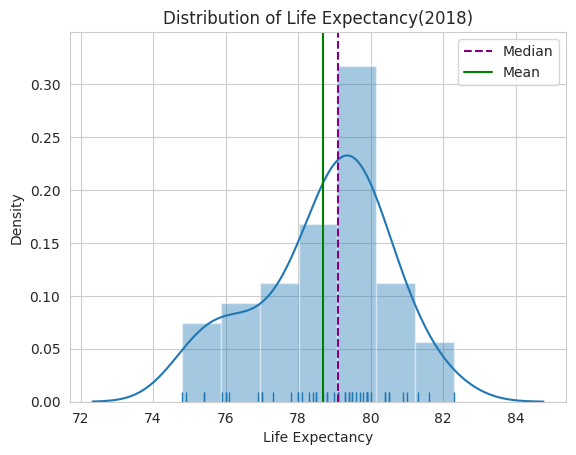

In [7]:
# Distribution of life expectancy
sns.set_style('whitegrid')
sns.distplot(x =merged_data['LifeExp2018'],kde = True, rug = True)
plt.axvline(merged_data['LifeExp2018'].median(), color = 'purple', linestyle = '--',label = 'Median')
plt.axvline(merged_data['LifeExp2018'].mean(), color = 'green', label = 'Mean')
plt.xlabel('Life Expectancy')
plt.title('Distribution of Life Expectancy(2018)')
plt.legend()
plt.show()

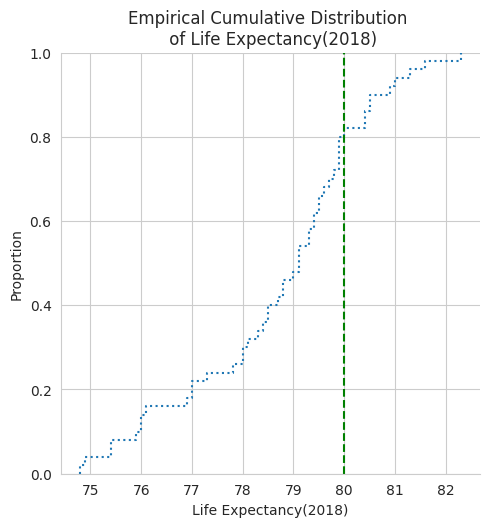

In [8]:
# Plot of the life empirical cumulative distribution function (ECDF) of life expectancy. The ECDF curve shows
# what percent of states have a life expectancy greater than 80 years

sns.displot(merged_data['LifeExp2018'],kind = 'ecdf', linestyle = ':')
plt.axvline(x = 80, color = 'green', linestyle = '--')
plt.xlabel('Life Expectancy(2018)')
plt.title('Empirical Cumulative Distribution \n of Life Expectancy(2018)')
plt.show()

3. Is life expectancy equally distributed across the different regions of the U.S.? Which region shows the highest variation (dispersion) in life expectancy?

In [9]:
# Life expectancy summary statistics, grouping the observations by region
life_exp_data = merged_data[['LifeExp2018','Region']]
life_exp_data.groupby('Region').describe()

LifeExp2018                                                    \
                    count       mean       std   min     25%    50%     75%   
Region                                                                        
North Central        12.0  78.783333  1.264072  76.9  77.825  79.20  79.450   
Northeast             9.0  79.911111  0.985450  78.3  79.500  79.90  80.500   
South                16.0  77.087500  1.750000  74.8  75.775  76.55  78.575   
West                 13.0  79.761538  1.218290  78.1  78.800  79.80  80.400   

                     
                max  
Region               
North Central  81.0  
Northeast      81.3  
South          80.0  
West           82.3

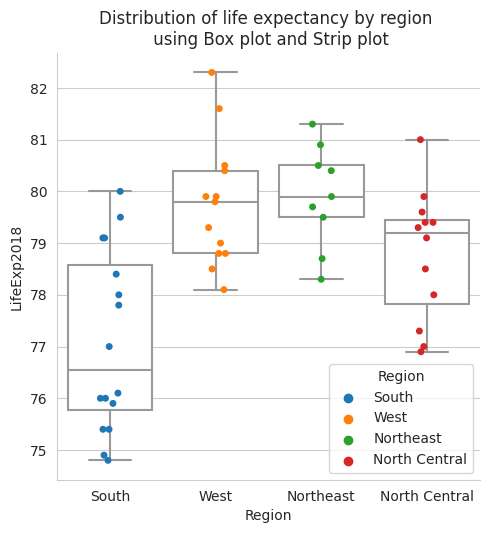

In [10]:
# Box plot,strip plot to show distribution by region

sns.catplot(x = 'Region',y = 'LifeExp2018', data = life_exp_data, kind = "box" ,color = 'w')
sns.stripplot(data=life_exp_data, x="Region", y="LifeExp2018", hue = 'Region')
plt.title("Distribution of life expectancy by region \n using Box plot and Strip plot")
plt.show()

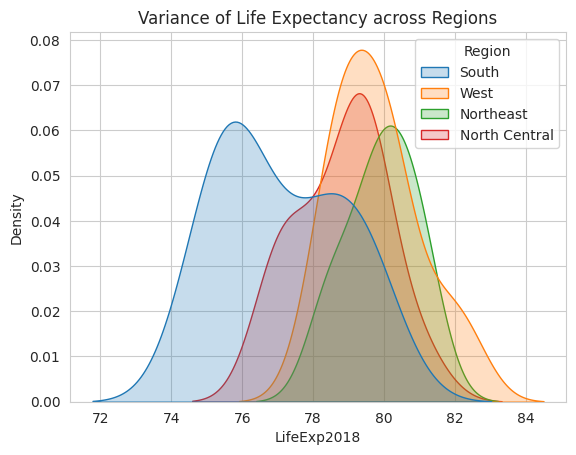

In [11]:
# KDE plot to show distribution by region

sns.kdeplot(
   data=life_exp_data, x="LifeExp2018", hue="Region",
   fill=True
)
plt.title("Variance of Life Expectancy across Regions")
plt.show()

4. Is educational level in the U.S. equally distributed among high school, bachelor’s, and advanced degrees? Does one of these levels show a greater spread across the states?

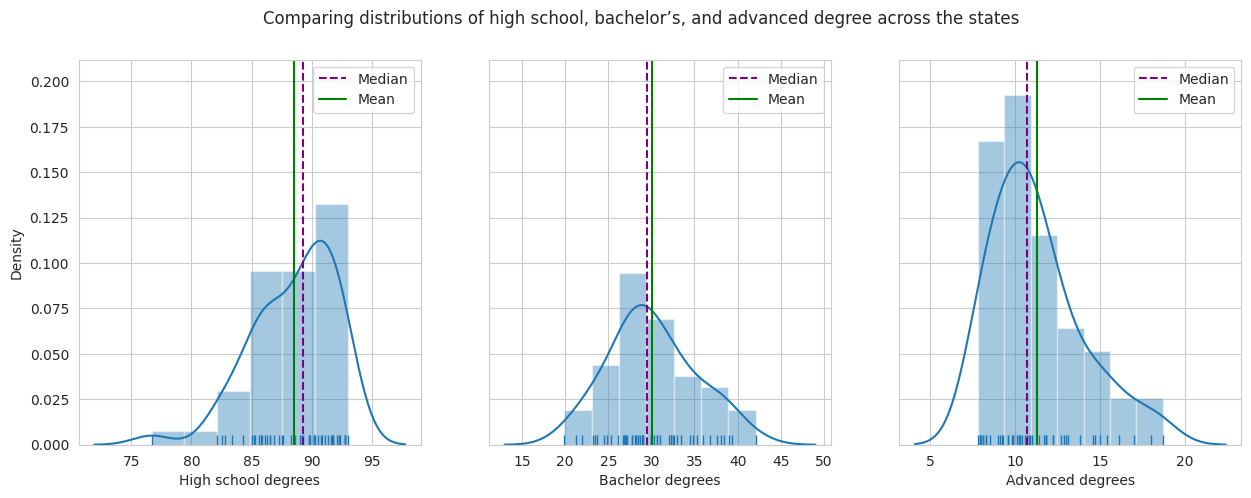

In [12]:
# Distribution of education variables 
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Comparing distributions of high school, bachelor’s, and advanced degree across the states')
sns.distplot(ax=axes[0],x =merged_data['HSGradPer'],kde = True, rug = True)
axes[0].axvline(merged_data['HSGradPer'].median(), color = 'purple', linestyle = '--',label = 'Median')
axes[0].axvline(merged_data['HSGradPer'].mean(), color = 'green', label = 'Mean')
axes[0].set_xlabel('High school degrees')
axes[0].legend()
sns.distplot(ax=axes[1],x =merged_data['BADegPer'],kde = True, rug = True)
axes[1].axvline(merged_data['BADegPer'].median(), color = 'purple', linestyle = '--',label = 'Median')
axes[1].axvline(merged_data['BADegPer'].mean(), color = 'green', label = 'Mean')
axes[1].set_xlabel('Bachelor degrees')
axes[1].legend()
sns.distplot(ax=axes[2],x =merged_data['AdvDegPer'],kde = True, rug = True)
axes[2].axvline(merged_data['AdvDegPer'].median(), color = 'purple', linestyle = '--',label = 'Median')
axes[2].axvline(merged_data['AdvDegPer'].mean(), color = 'green', label = 'Mean')
axes[2].set_xlabel('Advanced degrees')
axes[2].legend()
plt.show()

In [13]:
edu_data = merged_data[['HSGradPer','BADegPer','AdvDegPer']]
edu_data = edu_data.rename(columns={"HSGradPer": "High School", "BADegPer": "Bachelor","AdvDegPer":"Advanced"})

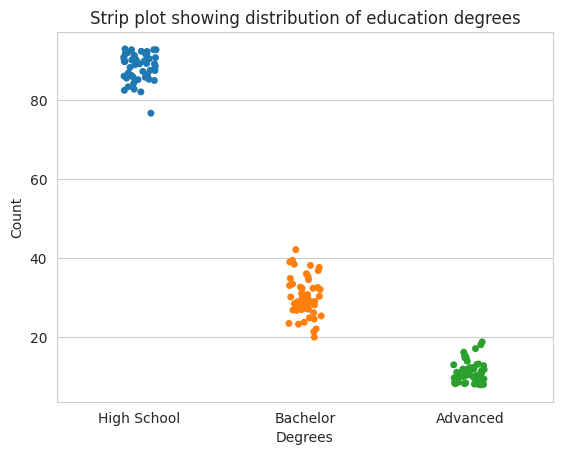

In [14]:
sns.stripplot(data=edu_data)
plt.xlabel("Degrees")
plt.ylabel("Count")
plt.title("Strip plot showing distribution of education degrees")
plt.show()

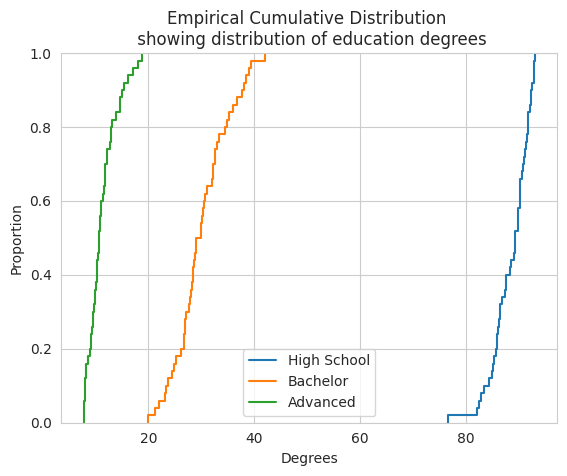

In [15]:
sns.ecdfplot(data=edu_data)
plt.xlabel("Degrees")
plt.title("Empirical Cumulative Distribution \n showing distribution of education degrees")
plt.show()